# Lesson 11 Assessment 2 (insight inc)

# Import the necessary Liabraries

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
from scipy import stats

In [4]:
import seaborn as sns

In [5]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

## 1.Load the dataset and perform initial data exploration.

In [6]:
customer_satisfaction_df = pd.read_csv(r'C:\Users\Itumeleng.Sekoma\Desktop\Test777777\.ipynb_checkpoints\customer_satisfaction_dataset.csv')
customer_satisfaction_df.head()

,Customer_ID,Product_Version,Satisfaction_Score
0,1,C,75.73
1,2,A,62.54
2,3,C,79.06
3,4,C,74.25
4,5,A,71.42


In [7]:
customer_satisfaction_df.tail()

,Customer_ID,Product_Version,Satisfaction_Score
995,996,B,74.95
996,997,B,72.45
997,998,C,68.20
998,999,C,85.45
999,1000,A,89.33


In [8]:
customer_satisfaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         1000 non-null   int64  
 1   Product_Version     1000 non-null   object 
 2   Satisfaction_Score  1000 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 23.6+ KB


In [9]:
customer_satisfaction_df.describe()

,Customer_ID,Satisfaction_Score
count,1000.000000,1000.000000
mean,500.500000,76.067950
std,288.819436,14.876024
min,1.000000,31.560000
25%,250.750000,66.265000
50%,500.500000,75.930000
75%,750.250000,85.620000
max,1000.000000,114.490000


In [10]:
print(f"This DataFrame contains: {customer_satisfaction_df.shape[0]} observations, and {customer_satisfaction_df.shape[1]} fields")

This DataFrame contains: 1000 observations, and 3 fields


## 2.Formulate null and alternative hypotheses.

### 2.1 My Null Hypothesis (H0): There is no significant difference in customer satifaction across the three product versions 

### 2.2 My Alternative Hypothesis (H1): There is a significant difference in customer satifaction across the three product versions 

## 3.Conduct a one-way ANOVA test to compare satisfaction ratings across product versions.

In [11]:
product_versionA = customer_satisfaction_df[customer_satisfaction_df['Product_Version'] == 'A']['Satisfaction_Score']

In [12]:
product_versionB = customer_satisfaction_df[customer_satisfaction_df['Product_Version']== 'B']['Satisfaction_Score']

In [13]:
product_versionC = customer_satisfaction_df[customer_satisfaction_df['Product_Version'] == 'C']['Satisfaction_Score']

In [14]:
f_stat, p_value = stats.f_oneway(product_versionA,product_versionB,product_versionC)
print(f"F-Statistic: {f_stat} \nP-Value: {p_value}")

F-Statistic: 0.24375063049498374 
P-Value: 0.7837297248615913


## 4.Perform post-hoc analysis if necessary.


In [15]:
combined_df = customer_satisfaction_df[['Product_Version','Satisfaction_Score']]

In [16]:
if p_value < 0.05:
    print("\nANOVA is significant. Performing post-hoc analysis (Tukey's HSD):")
    data_combined = customer_satisfaction_df[['Product_Version', 'Satisfaction_Score']]
    tukey = pairwise_tukeyhsd(endog=data_combined['SatisfactionRating'],
                              groups=data_combined['ProductVersion'],
                              alpha=0.05)
    print(tukey)

## 5.Visualize the results and provide insights.

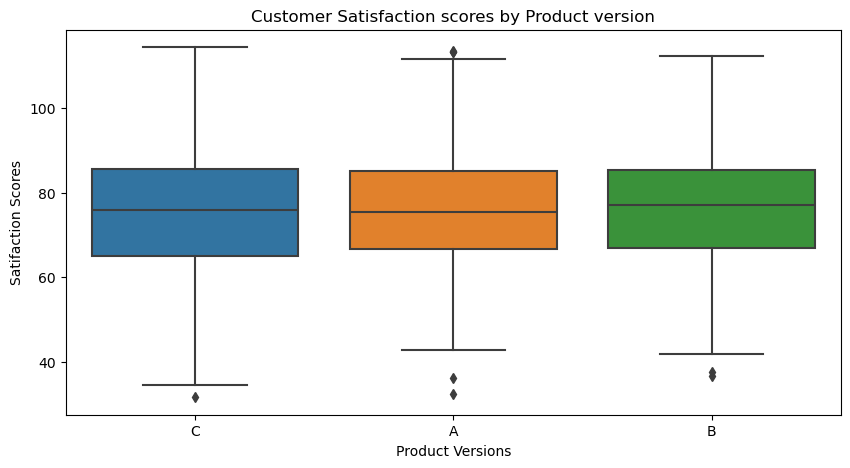

In [17]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Product_Version',y='Satisfaction_Score',data=customer_satisfaction_df)
plt.title('Customer Satisfaction scores by Product version')
plt.xlabel('Product Versions')
plt.ylabel('Satifaction Scores')
plt.show()

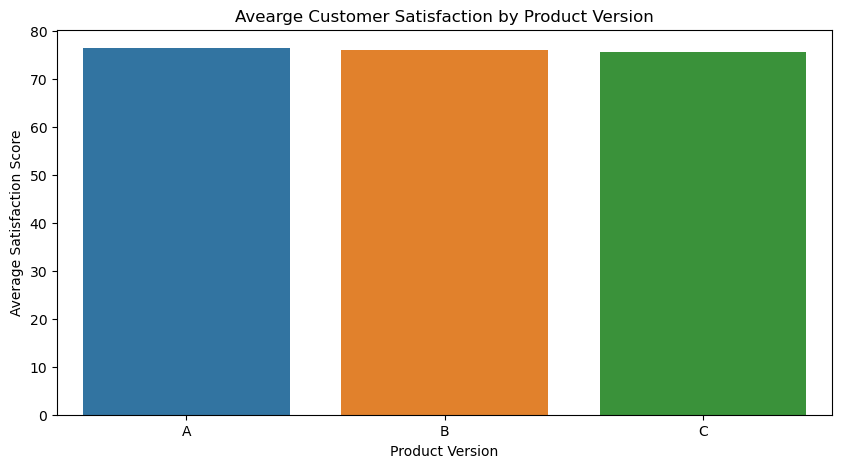

In [18]:
mean_customerSat_by_ProdV = customer_satisfaction_df.groupby('Product_Version')['Satisfaction_Score'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10,5))
sns.barplot(x='Product_Version',y='Satisfaction_Score',data=mean_customerSat_by_ProdV)
plt.title('Avearge Customer Satisfaction by Product Version')
plt.xlabel('Product Version')
plt.ylabel('Average Satisfaction Score')
plt.show()

## Just Extra code because I really enjoy doing this

### Find which product version has the highest Average Satisfaction Score

In [19]:
mean_customerSat_by_ProdV = round(mean_customerSat_by_ProdV,2)
print(mean_customerSat_by_ProdV)

  Product_Version  Satisfaction_Score
0               A               76.46
1               B               76.05
2               C               75.66


### Find and Visualize which product version has the highest(Maximum) Satisfaction Score

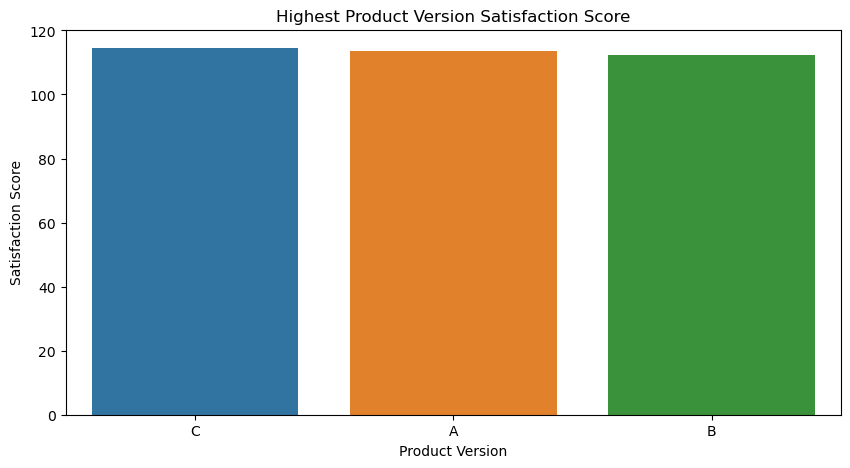

In [20]:
max_customerSat_by_ProdV = customer_satisfaction_df.groupby('Product_Version')['Satisfaction_Score'].max().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10,5))
sns.barplot(x='Product_Version',y='Satisfaction_Score',data=max_customerSat_by_ProdV)
plt.title('Highest Product Version Satisfaction Score')
plt.xlabel('Product Version')
plt.ylabel('Satisfaction Score')
plt.show()

In [21]:
print(max_customerSat_by_ProdV)

  Product_Version  Satisfaction_Score
0               C              114.49
1               A              113.70
2               B              112.39


### Find and Visualize which product version has the Lowest(Minimum) Satisfaction Score 
#### I will try creating a bar chart with categorical infromation on the vertical axis (y-axis) and the Discerete Numbers/Numerical values on the Horizontal axis(x-axis).

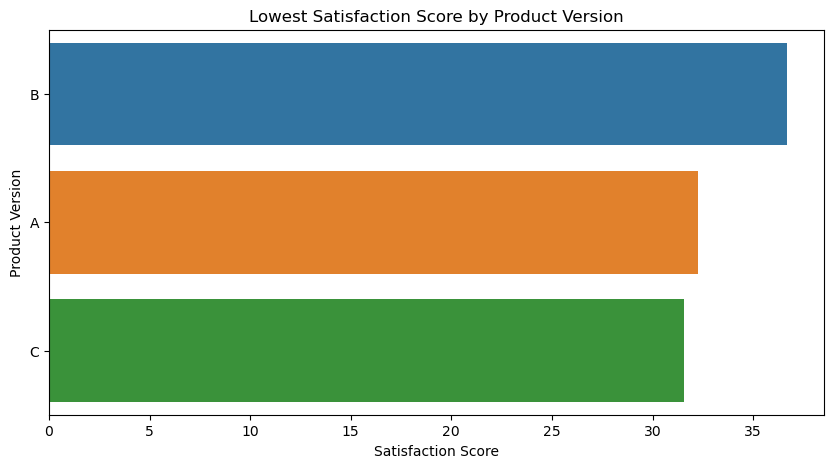

In [22]:
min_customerSat_by_ProdV = customer_satisfaction_df.groupby('Product_Version')['Satisfaction_Score'].min().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10,5))
sns.barplot(x='Satisfaction_Score', y='Product_Version', data=min_customerSat_by_ProdV)
plt.title('Lowest Satisfaction Score by Product Version')
plt.xlabel('Satisfaction Score')
plt.ylabel('Product Version')
plt.show()

In [23]:
print(min_customerSat_by_ProdV)

  Product_Version  Satisfaction_Score
0               B               36.69
1               A               32.27
2               C               31.56
